<a href="https://colab.research.google.com/github/piserushikesh/Gen_AI_Training/blob/main/Case_Study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Study Hours Analysis

# Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [4]:
dataset = pd.read_csv('score.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Scatter Plot

Text(0, 0.5, 'Scores')

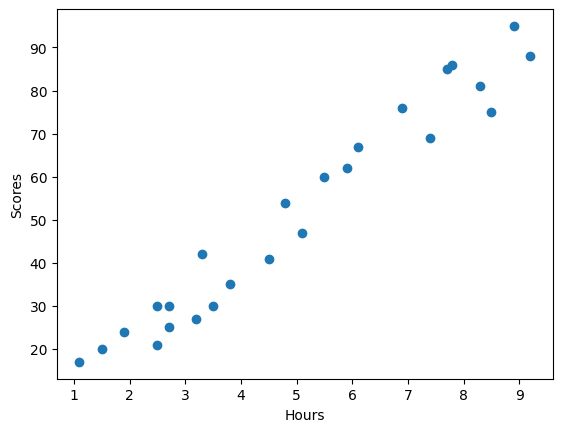

In [6]:
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

# finding correlation

In [7]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# seaborn for visualization

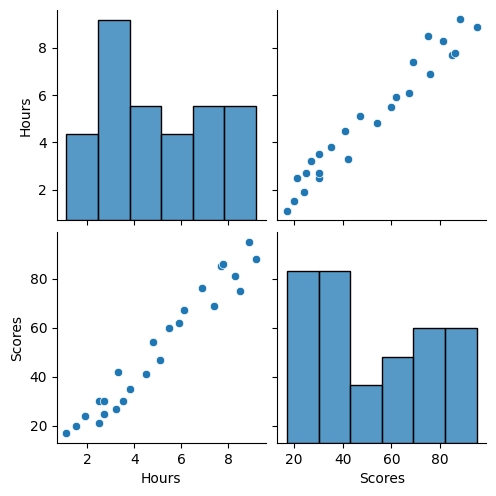

In [8]:
import seaborn as sns
sns.pairplot(dataset)

## Independent and dependent features

In [9]:
X = dataset[['Hours']]
y = dataset['Scores']

# Train and Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_test

array([[ 1.33499646],
       [-0.98326087],
       [-0.98326087],
       [ 0.77541711],
       [ 0.37571757]])

# Apply Simple Linear regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
print("Coeffient or slope : " ,regressor.coef_ )
print("Intercept : " ,regressor.intercept_ )

Coeffient or slope :  [24.22339085]
Intercept :  50.85000000000001


# plot Training data plot best fit line

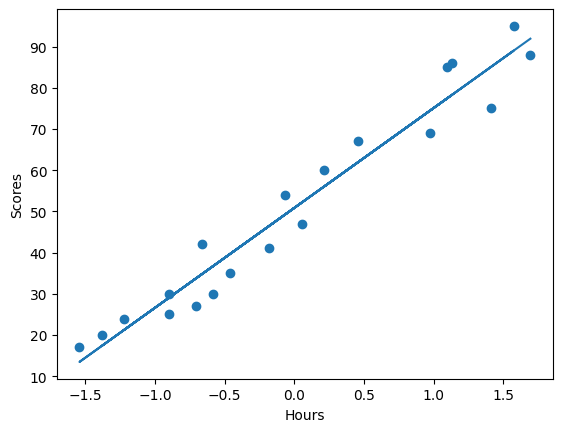

In [16]:
plt.scatter(X_train,y_train)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X_train,regressor.predict(X_train))

# Prediction for Test data

In [17]:
y_pred = regressor.predict(X_test)

# Performance Metrics

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

18.94321172231529
3.9207511902099257
4.35238000665329


# Prediction For new data

In [20]:
regressor.predict(scaler.transform([[10]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([99.6476739])

## Evaluating the Model Performance

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9678055545167993